###Exercise 1: Setting up the Environment

In [2]:
!pip install pgmpy

import numpy as np
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.inference import BeliefPropagation
from pgmpy.factors.discrete import TabularCPD

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.6 MB/s eta 0:00:00


##Exercise 2: Building a Simple Bayesian Network

In [4]:
model = BayesianModel([('Weather', 'Traffic'), ('Traffic', 'Late')])

Define Conditional Probability Tables (CPTs)

In [6]:
cpd_weather = TabularCPD(variable='Weather', variable_card=2, values=[[0.8], [0.2]])
cpd_traffic = TabularCPD(variable='Traffic', variable_card=2, values=[[0.9, 0.5], [0.1, 0.5]], evidence=['Weather'], evidence_card=[2])
cpd_late = TabularCPD(variable='Late', variable_card=2, values=[[0.95, 0.4], [0.05, 0.6]], evidence=['Traffic'], evidence_card=[2])

model.add_cpds(cpd_weather, cpd_traffic, cpd_late)
assert model.check_model()

###Exercise 3: Querying the Bayesin Network

In [ ]:
Inference = VariableElimination(model)
result = Inference.query(variables=['Late'], evidence={'Weather': 1})
print(result)

+---------+-------------+
| Late    |   phi(Late) |
+=========+=============+
| Late(0) |      0.6750 |
+---------+-------------+
| Late(1) |      0.3250 |
+---------+-------------+


###Exercise 4: Parameter Learning

In [7]:
import pandas as pd
import numpy as np
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator

data = pd.DataFrame({
    "Weather": np.random.choice([0, 1], size=1000, p=[0.8, 0.2]),
    "Traffic": np.nan,
    "Late": np.nan
})

data.loc[data["Weather"] == 0, "Traffic"] = np.random.choice(
    [0, 1],
    size=data[data["Weather"] == 0].shape[0],
    p=[0.9, 0.1]
)

data.loc[data["Weather"] == 1, "Traffic"] = np.random.choice(
    [0, 1],
    size=data[data["Weather"] == 1].shape[0],
    p=[0.5, 0.5]
)

data["Late"] = np.where(
    data["Traffic"] == 0,
    np.random.choice([0, 1], size=data.shape[0], p=[0.95, 0.05]),
    np.random.choice([0, 1], size=data.shape[0], p=[0.4, 0.6])
)

model = BayesianModel([("Weather", "Traffic"), ("Traffic", "Late")])
model.fit(data, estimator=MaximumLikelihoodEstimator)

for cpd in model.get_cpds():
    print(cpd)

+------------+-------+
| Weather(0) | 0.791 |
+------------+-------+
| Weather(1) | 0.209 |
+------------+-------+
+--------------+--------------------+---------------------+
| Weather      | Weather(0)         | Weather(1)          |
+--------------+--------------------+---------------------+
| Traffic(0.0) | 0.8988621997471555 | 0.49282296650717705 |
+--------------+--------------------+---------------------+
| Traffic(1.0) | 0.1011378002528445 | 0.507177033492823   |
+--------------+--------------------+---------------------+
+---------+---------------------+--------------------+
| Traffic | Traffic(0.0)        | Traffic(1.0)       |
+---------+---------------------+--------------------+
| Late(0) | 0.952088452088452   | 0.3763440860215054 |
+---------+---------------------+--------------------+
| Late(1) | 0.04791154791154791 | 0.6236559139784946 |
+---------+---------------------+--------------------+


###Exercise 5: Visualizing The Bayesian Network

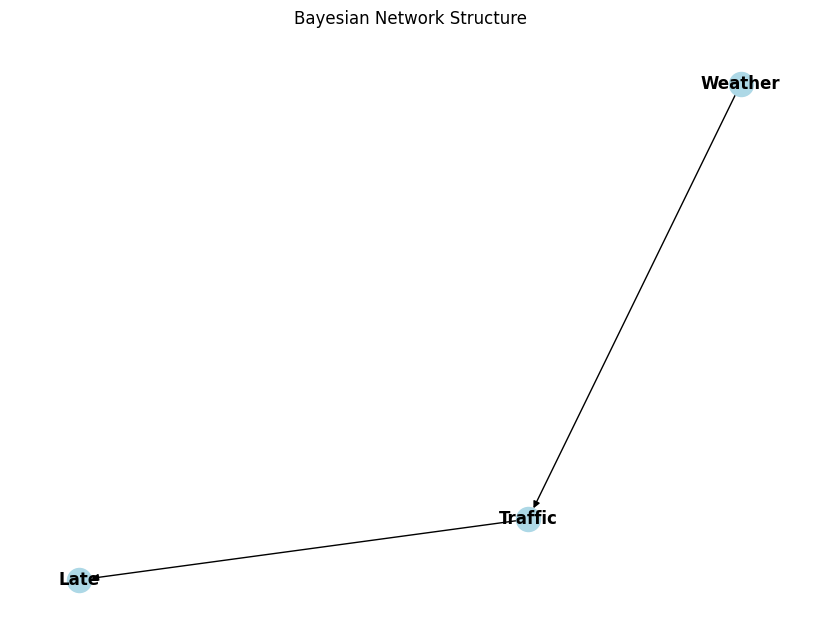

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

bayes_network = nx.DiGraph(model.edges())
plt.figure(figsize=(8, 6))
layout = nx.spring_layout(bayes_network)
nx.draw(
    bayes_network, layout,
    with_labels=True, node_color="lightblue",
    font_weight="bold", arrows=True
)

plt.title("Bayesian Network Structure")
plt.show()